In [1]:
import sys
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

In [ ]:
from ml_models.pipeline_for_regression import run_model

model, X_train, df_stats, df_test = run_model('catboost', use_feature_engineering=True, use_bet_odds=True)

c:\Users\Utilisateur\Desktop\Projets python\horse_racing\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      63531 non-null  category
 1   config                     63531 non-null  category
 2   surface                    63531 non-null  category
 3   distance                   63531 non-null  category
 4   going                      63531 non-null  category
 5   horse_ratings              63531 non-null  category
 6   race_class                 63531 non-null  category
 7   horse_id                   63531 non-null  int64   
 8   horse_age                  63531 non-null  int64   
 9   horse_country              63531 non-null  category
 10  horse_type                 63531 non-null  category
 11  horse_rating               63531 non-null  category
 12  actual_weight              63531 non-null  int64   
 13  draw                       63531 non-

Correlation matrix over X_train

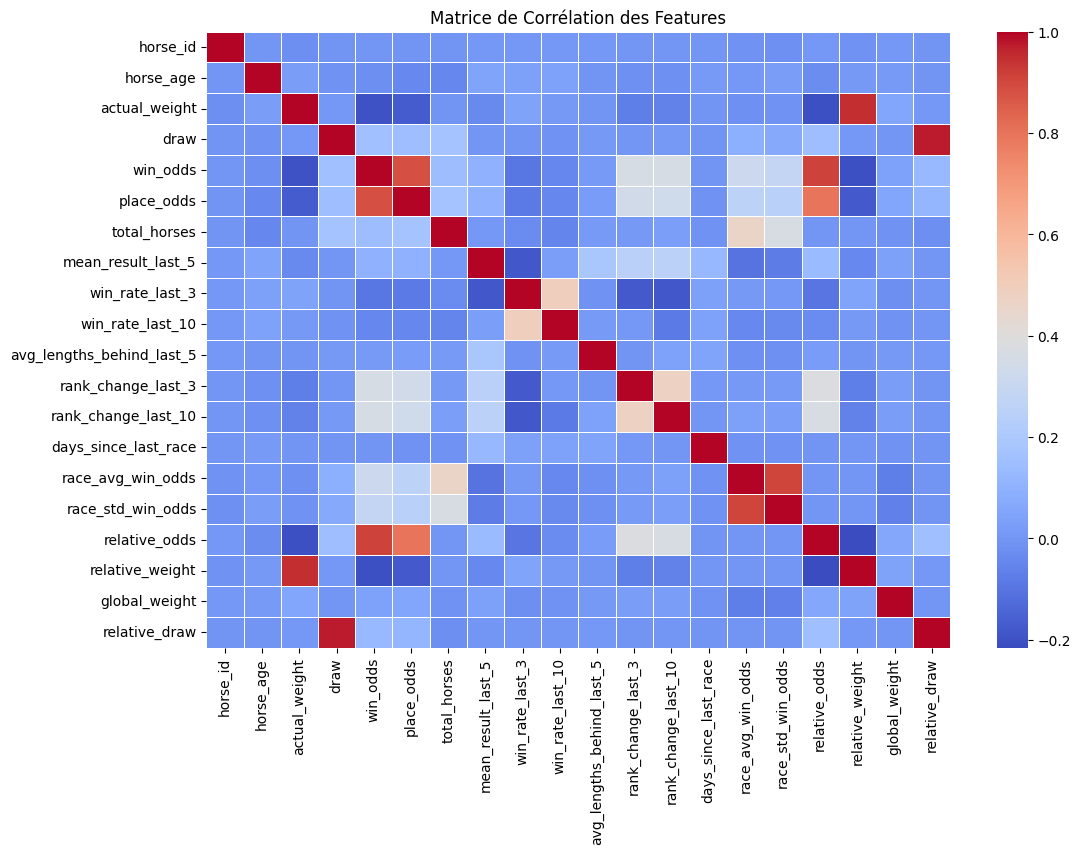

In [ ]:
X_train_numeric = X_train.select_dtypes(include=["number"])

corr_matrix = X_train_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()


1. check les corrélations entre features
2. check la variance de la feature (si trop faible, inefficace)
3. check la performance si on l'enlève

Correlation Matrix over df_test (with target)

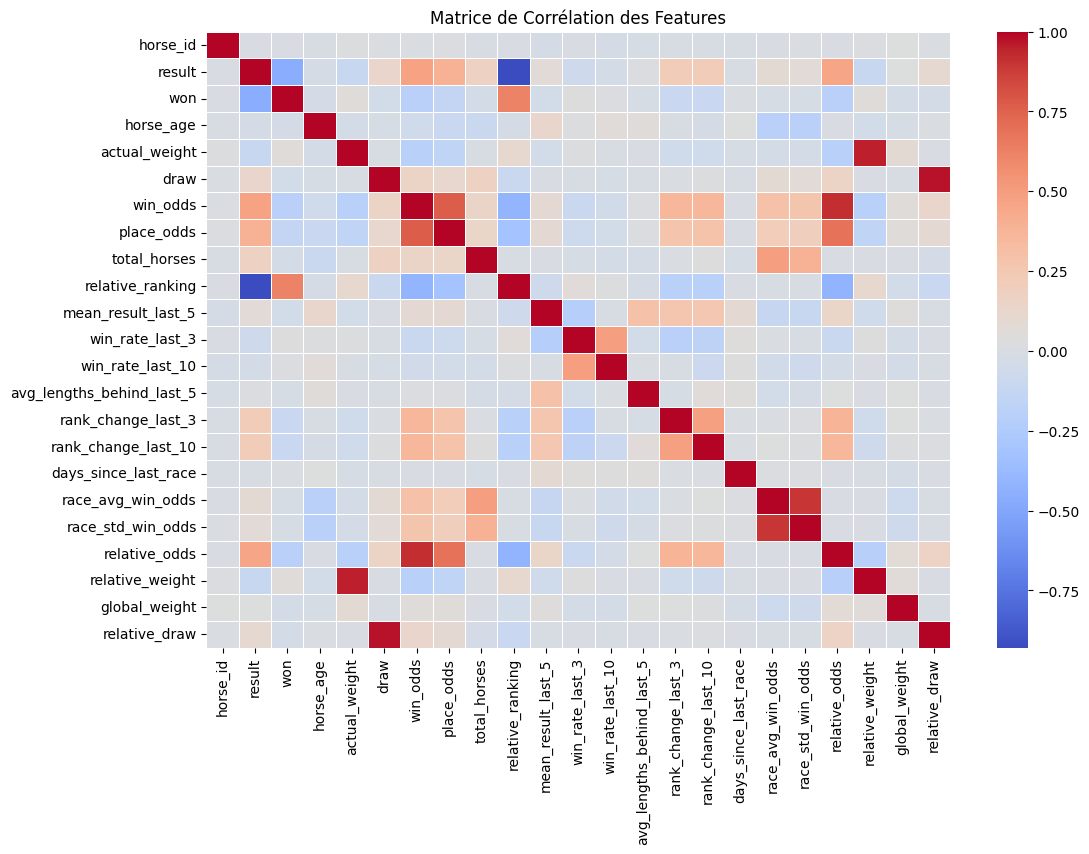

In [ ]:
df_test_numeric = df_test.select_dtypes(include=["number"])

corr_matrix = df_test_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()


In [ ]:
low_variance_features = X_train_numeric.var()[X_train_numeric.var() < 0.05].index.tolist()
print("Features avec très faible variance :", low_variance_features)


Features avec très faible variance : ['win_rate_last_3', 'win_rate_last_10', 'relative_weight']


In [ ]:
low_variance_features = df_test_numeric.var()[df_test_numeric.var() < 0.05].index.tolist()
print("Features avec très faible variance :", low_variance_features)

Features avec très faible variance : ['win_rate_last_3', 'win_rate_last_10', 'relative_weight']


In [ ]:
df_test_numeric = df_test.select_dtypes(include=["number"])
df_test_numeric.drop(columns=['relative_ranking','result'], inplace=True)

# Calcul de la corrélation avec "won"
correlations = df_test_numeric.corr()["won"].abs().sort_values(ascending=False)

# Sélection des 10 features les plus corrélées
top_correlated = correlations.drop("won")

# Affichage des résultats
print("🔝 Top des variables les plus corrélées avec 'won':")
print(top_correlated)


🔝 Top des variables les plus corrélées avec 'won':
relative_odds                0.196236
win_odds                     0.193990
place_odds                   0.135115
rank_change_last_3           0.101593
rank_change_last_10          0.101043
relative_weight              0.056513
actual_weight                0.053964
draw                         0.042680
win_rate_last_3              0.040778
mean_result_last_5           0.040641
relative_draw                0.038404
total_horses                 0.035450
global_weight                0.034247
horse_age                    0.028641
win_rate_last_10             0.017694
race_avg_win_odds            0.017260
avg_lengths_behind_last_5    0.014860
race_std_win_odds            0.014331
days_since_last_race         0.008436
horse_id                     0.001234
Name: won, dtype: float64
